# Regression and Other Stories: Chapter 7

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az
import numpy as np

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
hibbs = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat",
                    delimiter=" ")



Text(0, 0.5, "Incumbent party's vote share")

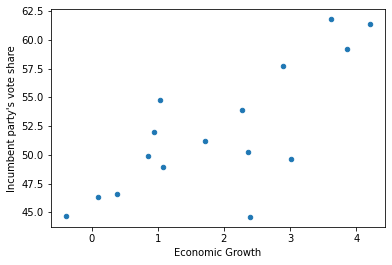

In [5]:
fig, ax = plt.subplots()
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel("Economic Growth")
ax.set_ylabel("Incumbent party's vote share")

In [6]:
model = Model(hibbs)
results = model.fit('vote ~ growth', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [vote_sd, growth, Intercept]
INFO:pymc3:NUTS: [vote_sd, growth, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:T

In [7]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],47.124,1.090
growth[0],2.650,0.474
vote_sd,3.939,0.491


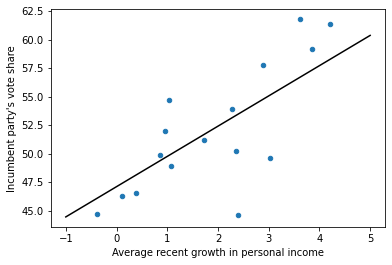

In [11]:
fig, ax = plt.subplots()

hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel("Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share")

x = np.array([-1, 5])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["growth[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black");

In [12]:
1 - stats.norm(52.3, 3.9).cdf(50)

0.7223187166432111

In [13]:
a = 46.3
b = 3.0
sigma = 3.9
x = hibbs["growth"]
n = x.shape

In [19]:
y = a + b*x + stats.norm(0, sigma).rvs(n)
fake = pd.DataFrame(dict(x=x, y=y))

In [20]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [21]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],45.299,1.014
x[0],2.802,0.432
y_sd,3.593,0.475
